In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
from transformers import *

ModuleNotFoundError: ignored

In [0]:
import pandas as pd
rootpath='/home/mal/Documents/simra/Task1/'
d1=pd.read_csv(rootpath+'TRAIN.csv')
d2=pd.read_csv(rootpath+'VALIDATION.csv')
d3=pd.read_csv(rootpath+'TEST.csv')
df = pd.concat([d1, d2], ignore_index=True)
df_new=df.dropna()

In [0]:
df_new

In [0]:
df_new.drop(df_new.columns[[0]], axis = 1, inplace = True)
d3.drop(d3.columns[[0]], axis = 1, inplace = True)

In [2]:
df_new

NameError: ignored

In [3]:
df_new['idx']=df_new.index
d3['idx'] = d3.index

NameError: ignored

In [0]:
df_new

,Labels,Text,idx
0,0,"In late December 2011 , CrowdStrike , Inc. rec...",0
1,0,The files were analyzed to understand first if...,1
2,0,The samples were clearly malicious and varied ...,2
3,1,All three samples provided remote access to th...,3
4,1,One sample is typical of what is commonly refe...,4
...,...,...,...
10516,0,Let us show you how CrowdStrike can help you u...,10516
10517,0,888 - 512 - 8906 www.crowdstrike.com two thous...,10517
10518,0,CrowdStrike Falcon enables customers to preven...,10518
10519,0,CrowdStrike customers include some of the larg...,10519


In [0]:
df_new=df_new.rename(columns={'Labels': "label", 'Text': "sentence", 'idx': "idx"})
d3=d3.rename(columns={'Labels': "label", 'Text': "sentence", 'idx': "idx"})

In [0]:
d3

,label,sentence,idx
0,0,Low - profile information - stealing Trojan is...,0
1,0,Symantec has uncovered an elusive Trojan used ...,1
2,0,Seaduke ( detected by Symantec as Trojan . Sea...,2
3,0,Seaduke has been used in attacks against a num...,3
4,0,The malware hides behind numerous layers of en...,4
...,...,...,...
613,1,This stealth might be its most important attri...,613
614,0,"As we will see , identifying web shells can be...",614
615,0,"In our next post , we will discuss techniques ...",615
616,0,Stay tuned for Parts 2 - 4 as we cover File St...,616


In [0]:
d3

,label,sentence,idx
0,0,Low - profile information - stealing Trojan is...,0
1,0,Symantec has uncovered an elusive Trojan used ...,1
2,0,Seaduke ( detected by Symantec as Trojan . Sea...,2
3,0,Seaduke has been used in attacks against a num...,3
4,0,The malware hides behind numerous layers of en...,4
...,...,...,...
613,1,This stealth might be its most important attri...,613
614,0,"As we will see , identifying web shells can be...",614
615,0,"In our next post , we will discuss techniques ...",615
616,0,Stay tuned for Parts 2 - 4 as we cover File St...,616


In [0]:
# Class count
count_class_0, count_class_1 = df_new.label.value_counts()

# Divide by class
df_class_0 = df_new[df_new['label'] == 0]
df_class_1 = df_new[df_new['label'] == 1]

Random under-sampling:
1    2276
0    2276
Name: label, dtype: int64


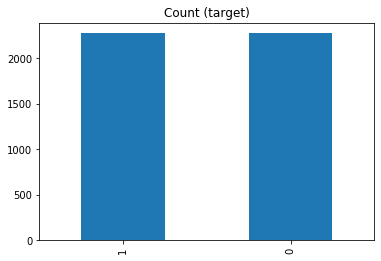

In [0]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.label.value_counts())

df_test_under.label.value_counts().plot(kind='bar', title='Count (target)');

In [0]:
df_new=df_test_under

In [0]:
train_df = tf.data.Dataset.from_tensor_slices(dict(df_new))
test_df = tf.data.Dataset.from_tensor_slices(dict(d3))

for feature_batch in train_df.take(1):
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

  'label'             : 0
  'sentence'          : b'The Whois record Notable Activity for this website is the same as for some of the other domains related to the activity discussed above , which indicates that it was also in use by this adversary , but the actual purpose of the website is still unknown .'
  'idx'               : 9999


In [0]:
train_df

<TensorSliceDataset shapes: {label: (), sentence: (), idx: ()}, types: {label: tf.int32, sentence: tf.string, idx: tf.int32}>

In [0]:
# load a csv
#CSV_PATH = rootpath+'TRAIN.csv'
#dataset = tf.contrib.data.make_csv_dataset(CSV_PATH, batch_size=32)
#iter = dataset.make_one_shot_iterator()
#next = iter.get_next()
#print(next) # next is a dict with key=columns names and value=column data

In [0]:
#inputs, labels = next['text'], next['sentiment']

#with  tf.Session() as sess:
   # print(sess.run([inputs,labels]))

In [0]:
# Load dataset, tokenizer, model from pretrained model/vocabulary
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [0]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased')

In [0]:
#data = tensorflow_datasets.load('glue/sst2')

In [0]:
#data['train']

In [0]:
train_dataset = glue_convert_examples_to_features(train_df, tokenizer, max_length=128, task='sst-2')

In [0]:
test_dataset = glue_convert_examples_to_features(test_df, tokenizer, max_length=128, task='sst-2')

In [0]:
train_dataset = train_dataset.shuffle(100).batch(32).repeat(10)
valid_dataset = test_dataset.batch(64)

In [0]:
# Prepare dataset for GLUE as a tf.data.Dataset instance
#train_dataset = glue_convert_examples_to_features(train_df, tokenizer, max_length=128, task='mrpc')
#valid_dataset = glue_convert_examples_to_features(data['validation'], tokenizer, max_length=128, task='mrpc')
#train_dataset = train_dataset.shuffle(100).batch(32).repeat(2)
#valid_dataset = valid_dataset.batch(64)

In [0]:
# Prepare training: Compile tf.keras model with optimizer, loss and learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train and evaluate using tf.keras.Model.fit()
history = model.fit(train_dataset, epochs=5, steps_per_epoch=115,
                    validation_data=valid_dataset, validation_steps=7)

Train for 115 steps, validate for 7 steps
Epoch 1/5
115/115 [==============================] - 63s 546ms/step - loss: 0.1275 - accuracy: 0.9723 - val_loss: 4.7888 - val_accuracy: 0.1719
Epoch 2/5
115/115 [==============================] - 41s 358ms/step - loss: 0.3693 - accuracy: 0.8988 - val_loss: 1.9607 - val_accuracy: 0.1719
Epoch 3/5
115/115 [==============================] - 41s 356ms/step - loss: 0.2152 - accuracy: 0.9300 - val_loss: 0.8503 - val_accuracy: 0.8281
Epoch 4/5
115/115 [==============================] - 41s 358ms/step - loss: 0.2577 - accuracy: 0.9281 - val_loss: 0.4765 - val_accuracy: 0.8281
Epoch 5/5
115/115 [==============================] - 41s 359ms/step - loss: 0.5450 - accuracy: 0.8061 - val_loss: 2.6065 - val_accuracy: 0.1719


In [0]:
# Load the TensorFlow model in PyTorch for inspection
model.save_pretrained('/home/mal/Documents/simra/Task1/bert-un')

In [0]:
pytorch_model = BertForSequenceClassification.from_pretrained('/home/mal/Documents/simra/Task1/bert-un', from_tf=True)

In [0]:
y_true = []
y_pred = []
for id,row in d3.iterrows():
  sent=row['sentence']
  if(len(sent)<=500):
    y_true.append(row['label'])
    inputs_1 = tokenizer.encode_plus(sent, add_special_tokens=True, return_tensors='pt')
    pred_1 = pytorch_model(inputs_1['input_ids'], token_type_ids=inputs_1['token_type_ids'])[0].argmax().item()
    y_pred.append(pred_1)

In [0]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       526
     class 1       0.14      1.00      0.25        89

    accuracy                           0.14       615
   macro avg       0.07      0.50      0.13       615
weighted avg       0.02      0.14      0.04       615



/home/mal/Downloads/yes/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# Quickly test a few predictions - MRPC is a paraphrasing task, let's see if our model learned the task
sentence_0 = "Malware acts as a chatbot for C2C servers"
sentence_1 = "His findings were compatible with this research."
sentence_2 = "His findings were not compatible with this research."
inputs_1 = tokenizer.encode_plus(sentence_0, sentence_1, add_special_tokens=True, return_tensors='pt')
inputs_2 = tokenizer.encode_plus(sentence_0, sentence_2, add_special_tokens=True, return_tensors='pt')

pred_1 = pytorch_model(inputs_1['input_ids'], token_type_ids=inputs_1['token_type_ids'])[0].argmax().item()
pred_2 = pytorch_model(inputs_2['input_ids'], token_type_ids=inputs_2['token_type_ids'])[0].argmax().item()

print("sentence_1 is", "a paraphrase" if pred_1 else "not a paraphrase", "of sentence_0")
print("sentence_2 is", "a paraphrase" if pred_2 else "not a paraphrase", "of sentence_0")